In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [73]:
# Creation, training, prediction and improving of the neural network architecture
# The dataset is a classification based problem of a bank employees where to tell which employee will left the job
# Author: Muhammad Humayun Khan

dataset = "/kaggle/input/churn-modelling/Churn_Modelling.csv"
df = pd.read_csv(dataset)
df.head()      # selection of first 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
df.sample(5)   # selection of random 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
20,21,15577657,McDonald,732,France,Male,41,8,0.00,2,1,1,170886.17,0
6182,6183,15723786,Morris,709,France,Female,37,9,0.00,2,1,0,16733.59,0
2431,2432,15782247,Yeh,540,France,Male,22,4,0.00,3,1,1,186233.26,1
6686,6687,15641285,Yusupova,621,Spain,Male,50,3,163085.79,1,0,1,131048.36,0
7998,7999,15772482,Iloerika,829,Germany,Male,28,3,132405.52,3,1,0,104889.20,1


In [75]:
df.shape

(10000, 14)

In [76]:
# remove the not so important columns
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# check for the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [78]:
# check for the duplicated rows
df.duplicated().sum()

0

In [79]:
# how many customers leave the bank
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [80]:
# check geography and gender cateogries
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [81]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [82]:
# use one-hot encoding to transform the categorical columns
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [83]:
# apply the train-test split
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Exited'])   # features without the last columns which is ofcourse the Y/target column
y = df['Exited']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [84]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [85]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [86]:
# few of the numbers are bigger, so scale the values in order that weight conversion rate is fast
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [87]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer

In [102]:
# there are two models to be build in keras such as sequential and non-sequential
# here it is the sequential neural architecture

model = Sequential()
model.add(InputLayer(shape=(11,)))   # inputs are 11 in number and better to separate the input dimensions

# add is func having Dense class object with 3 nodes/perceptron per layer and activation function
model.add(Dense(3, activation='sigmoid'))

# for output perceptron, node is 1 and activation is sigmoid
model.add(Dense(1,activation = 'sigmoid'))


In [89]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
# now compile the model. The model needs some data such as loss function, gradient optimization parameter
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [111]:
# train the model with the scaled data and note down the loss value
model.fit(X_train_trf,y_train,epochs=10)

# at this stage the weights and bias values are calculated and the model is trained on our data

history_old = model.fit(X_train_trf,y_train,epochs=10)    # history_old is used to plot the graph

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8572 - loss: 0.3512
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.3447
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3311
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3493
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8616 - loss: 0.3420
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8574 - loss: 0.3529
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8660 - loss: 0.3383
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8634 - loss: 0.3400
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8546 - loss: 0.3533
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8703 - loss: 0.3290
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3406
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [92]:
# to determine where the weights and bias are stored
model.layers[0].get_weights()

# first array is the weights
# second array is the bias values

[array([[ 0.14402676,  0.09538765,  0.17185248],
        [ 0.8109748 , -1.1677214 , -0.92151004],
        [ 0.13393976, -0.13090745,  0.2366524 ],
        [-0.3943655 , -0.2665998 , -0.3687887 ],
        [-1.5333995 , -0.04150891, -0.31446344],
        [ 0.03735724, -0.346228  ,  0.32442415],
        [-0.14883105,  0.55372334,  0.818191  ],
        [ 0.11965293,  0.13238144, -0.08344936],
        [ 0.4246393 , -0.37385187, -0.51098543],
        [ 0.07216214, -0.10691768,  0.02508612],
        [-0.09311644,  0.5190473 ,  0.29966828]], dtype=float32),
 array([-0.6357045 ,  0.33097506,  0.43435833], dtype=float32)]

In [93]:
model.layers[1].get_weights()

[array([[ 1.0502706],
        [-1.2428213],
        [-1.8053144]], dtype=float32),
 array([-0.29375333], dtype=float32)]

In [94]:
model.predict(X_test_trf)    # predict the model

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.08987518],
       [0.13606428],
       [0.11353243],
       ...,
       [0.05050678],
       [0.12091685],
       [0.37797302]], dtype=float32)

In [95]:
y_log = model.predict(X_test_trf)   # assign the value to the y log variable

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [96]:
# as the activation function is sigmoid so output will be probability between 0 and 1
# set the threshold as <= 0.5 means 0 and above is 1

y_predict = np.where(y_log > 0.5,1,0)

In [97]:
# calcuate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.808

In [100]:
# now lets improve the neural network
model = Sequential()
model.add(InputLayer(shape=(11,)))   # inputs are 11 in number and better to separate the input dimensions

model.add(Dense(11, activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [101]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [110]:
model.fit(X_train_trf,y_train,epochs = 100,validation_split = 0.2)
history_new = model.fit(X_train_trf,y_train,epochs = 100, validation_split = 0.2)  # history_new used for plotting of improved n/w

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8350 - loss: 0.3769 - val_accuracy: 0.8250 - val_loss: 0.3901
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8251 - loss: 0.3982 - val_accuracy: 0.8250 - val_loss: 0.3896
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.3800 - val_accuracy: 0.8250 - val_loss: 0.3889
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8322 - loss: 0.3765 - val_accuracy: 0.8250 - val_loss: 0.3881
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8307 - loss: 0.3798 - val_accuracy: 0.8256 - val_loss: 0.3872
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8194 - loss: 0.3926 - val_accuracy: 0.8263 - val_loss: 0.3862
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8303 - loss: 0.3726 - val_accuracy: 0.8269 - val_loss: 0.3852
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8262 - loss: 0.3862 - val_accu

In [107]:
model.predict(X_test_trf)    # predict the model
y_log = model.predict(X_test_trf)   # assign the value to the y log variable
y_pred = np.where(y_log > 0.5, 1, 0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

# accuracy improves from the prev model

0.8315

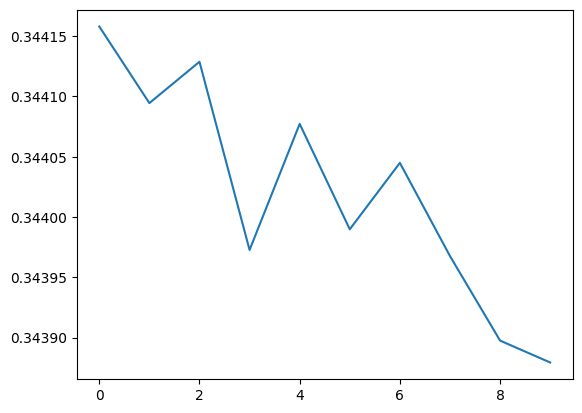

In [117]:
# plot both the graphs
import matplotlib.pyplot as plt

plt.plot(history_old.history['loss'])

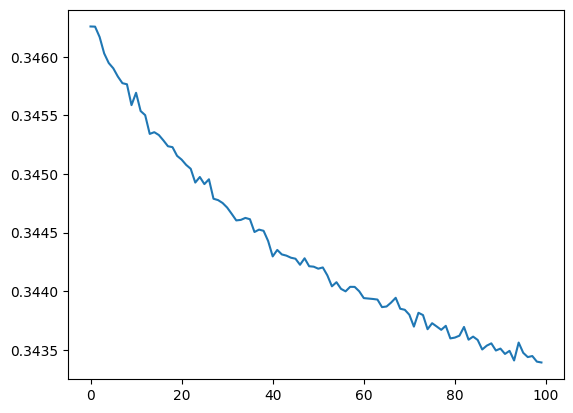

In [119]:
plt.plot(history_new.history['loss'])

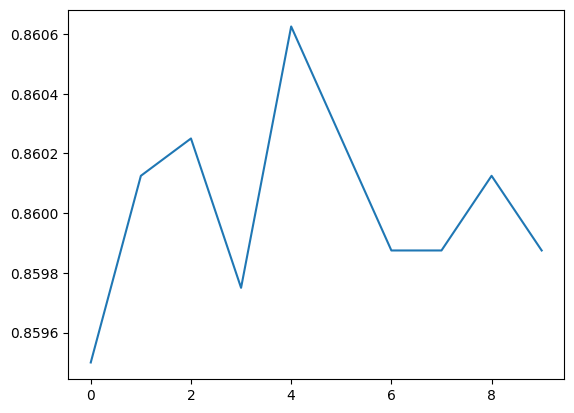

In [123]:
plt.plot(history_old.history['accuracy'])


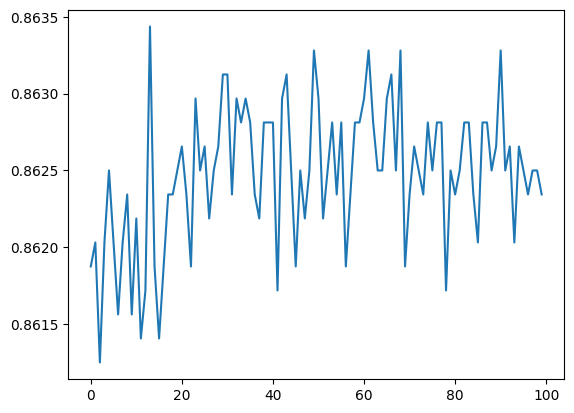

In [124]:
plt.plot(history_new.history['accuracy'])